In [1]:
import numpy as np
from numpy import random, exp
np.random.seed(2001)

def ans_func(x):
    y=(10*x**2-6*x**3+x**4)*np.exp(-x)
    return y

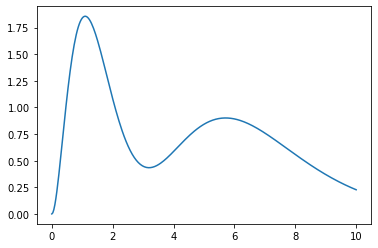

In [2]:
import matplotlib.pyplot as plt

x=np.linspace(0,10,300)
y=ans_func(x)
plt.plot(x,y)
plt.show()


In [3]:
# 訓練データの生成
dx_train=np.random.randn(40)*0.2
dy_train=np.random.randn(40)*0.2
x_train=np.random.rand(40)*10
y_train=ans_func(x_train)
x_train+=dx_train
y_train+=dy_train

# 検証データの生成
dx_valid=np.random.randn(40)*0.2
dy_valid=np.random.randn(40)*0.2
x_valid=np.random.rand(40)*10
y_valid=ans_func(x_valid)
x_valid+=dx_valid
y_valid+=dy_valid

In [4]:
w=np.polyfit(x_train,y_train,4)
y_pol=np.polyval(w,x)

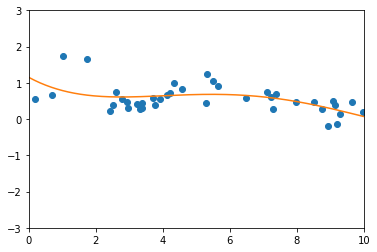

In [5]:
plt.xlim(0,10)
plt.ylim(-3,3)
plt.plot(x_train,y_train,'o')
plt.plot(x,y_pol)
plt.show()

In [6]:
%pip3 install tensorflow

UsageError: Line magic function `%pip3` not found.


In [7]:
import tensorflow as tf

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

In [9]:
# データの標準化
x_mean=x_train.mean()
x_std=x_train.std()
y_mean=y_train.mean()
y_std=y_train.std()
res_x_train=(x_train-x_mean)/x_std
res_y_train=(y_train-y_mean)/y_std
res_x_valid=(x_train-x_mean)/x_std
res_y_valid=(y_train-y_mean)/y_std

res_x=np.linspace(-x_mean/x_std,(10-x_mean)/x_std,300)
# print(res_x)

model=Sequential()
model.add(Dense(16,input_dim=1))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1,activation='linear'))

In [10]:
model.compile(loss='mean_squared_error',optimizer='Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [11]:
#学習の実行
results=model.fit(res_x_train,res_y_train,epochs=1000,batch_size=1,verbose=1,validation_data=(res_x_valid,res_y_valid))

Epoch 1/1000
40/40 [==============================] - 3s 17ms/step - loss: 0.9876 - val_loss: 0.9399
Epoch 2/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.9318 - val_loss: 0.8997
Epoch 3/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.8966 - val_loss: 0.8566
Epoch 4/1000
40/40 [==============================] - 0s 8ms/step - loss: 0.8649 - val_loss: 0.8350
Epoch 5/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.8231 - val_loss: 0.7984
Epoch 6/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.7988 - val_loss: 0.7801
Epoch 7/1000
40/40 [==============================] - 0s 7ms/step - loss: 0.7867 - val_loss: 0.7577
Epoch 8/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.7698 - val_loss: 0.7417
Epoch 9/1000
40/40 [==============================] - 0s 6ms/step - loss: 0.7486 - val_loss: 0.7314
Epoch 10/1000
40/40 [==============================] - 0s 9ms/step - loss: 0.7444 - val_loss: 0.723

KeyboardInterrupt: 

In [142]:
x=np.linspace(-1.7,1.7,1000)
w=np.polyfit(res_x_train,res_y_train,10)
y_pol=np.polyval(w,x)

### 多項式フィットとディープラーニングの比較

10/10 [==============================] - 0s 2ms/step


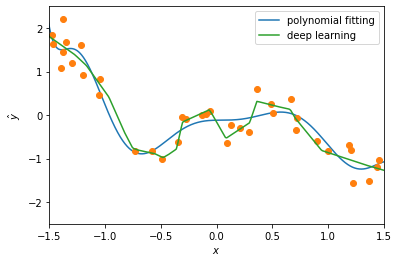

In [151]:
pred=model.predict(res_x)
plt.plot(x,y_pol,label='polynomial fitting')
plt.plot(res_x_train,res_y_train,'o')
plt.plot(res_x,pred,label='deep learning')
plt.xlim(-1.5,1.5)
plt.ylim(-2.5,2.5)
plt.xlabel('$x$')
plt.ylabel('$\hat{y}$')
plt.legend()
plt.savefig('pol-vs-DL.png')
plt.show()

In [ ]:
# 学習曲線
loss=results.history['loss']
vloss=results.history['val_loss']
plt.xlim(-20,1020)
plt.plot(loss,label='training')
plt.plot(vloss,label='validation')
plt.legend()
plt.savefig('curve_ep=1000_online.png')
plt.show()

活性化関数がシグモイド関数の場合

In [152]:
# データの標準化
x_mean=x_train.mean()
x_std=x_train.std()
y_mean=y_train.mean()
y_std=y_train.std()
res_x_train=(x_train-x_mean)/x_std
res_y_train=(y_train-y_mean)/y_std
res_x_valid=(x_train-x_mean)/x_std
res_y_valid=(y_train-y_mean)/y_std

res_x=np.linspace(-x_mean/x_std,(10-x_mean)/x_std,300)
# print(res_x)

model=Sequential()
model.add(Dense(16,input_dim=1,activation='sigmoid'))
model.add(Dense(16,input_dim=1,activation='sigmoid'))
model.add(Dense(16,input_dim=1,activation='sigmoid'))
model.add(Dense(1,activation='linear'))

In [153]:
model.compile(loss='mean_squared_error',optimizer='Adam')
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 16)                32        
                                                                 
 dense_69 (Dense)            (None, 16)                272       
                                                                 
 dense_70 (Dense)            (None, 16)                272       
                                                                 
 dense_71 (Dense)            (None, 1)                 17        
                                                                 
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [158]:
#学習の実行
results=model.fit(res_x_train,res_y_train,epochs=500,batch_size=4,verbose=1,validation_data=(res_x_valid,res_y_valid))

Epoch 1/500
10/10 [==============================] - 0s 9ms/step - loss: 0.3857 - val_loss: 0.3827
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3838 - val_loss: 0.3820
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3849 - val_loss: 0.3815
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3874 - val_loss: 0.3806
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3810 - val_loss: 0.3792
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3810 - val_loss: 0.3785
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3792 - val_loss: 0.3777
Epoch 8/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3785 - val_loss: 0.3768
Epoch 9/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3789 - val_loss: 0.3760
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 0.3779 - val_loss: 0.3752
Epoch 11/

10/10 [==============================] - 0s 1ms/step


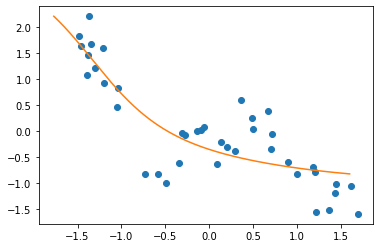

In [159]:
pred=model.predict(res_x)
plt.plot(res_x_train,res_y_train,'o')
plt.plot(res_x,pred)
plt.show()

サポートページより引用

In [2]:
# 図5.1のデータを生成する

import numpy as np
from numpy import random, exp
np.random.seed(1975)

# 正解の関数を定義
def ans_func(x):
  y = (10.*x**2 - 6.*x**3 + x**4) * np.exp(-x)
  return y

# 訓練データの生成
dx_train = np.random.randn(40) * 0.2   # dx ~ 0.2
dy_train = np.random.randn(40) * 0.2   # dy ~ 0.2
x_train = np.random.rand(40) * 10      # x in [0,10]
y_train = ans_func(x_train)
x_train += dx_train
y_train += dy_train

# 検証データの生成
dx_valid = np.random.randn(20) * 0.2   # dx ~ 0.2
dy_valid = np.random.randn(20) * 0.2   # dy ~ 0.2
x_valid = np.random.rand(20) * 10      # x in [0,10]
y_valid = ans_func(x_valid)
x_valid += dx_valid
y_valid += dy_valid

In [3]:
# FFNNを用いたフィット

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, \
  LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

# データの標準化
x_mean = x_train.mean()
x_std = x_train.std()
y_mean = y_train.mean()
y_std = y_train.std()
res_x_train = (x_train - x_mean)/x_std
res_y_train = (y_train - y_mean)/y_std
res_x_valid = (x_valid - x_mean)/x_std
res_y_valid = (y_valid - y_mean)/y_std
res_x = np.linspace(-x_mean/x_std, (10-x_mean)/x_std, 300)

# 学習モデルの構成
model = Sequential()
model.add(Dense(16, input_dim=1))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()

# 学習の実行
results = model.fit(res_x_train, res_y_train, epochs=1000, \
  batch_size=4, verbose=0, validation_data=(res_x_valid, \
  res_y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

10/10 [==============================] - 0s 4ms/step


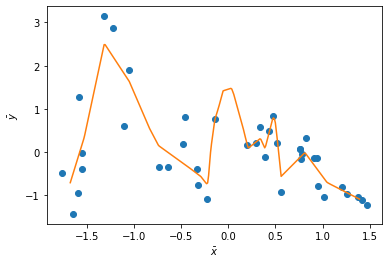

In [4]:
# 結果をプロット
import matplotlib.pyplot as plt

pred = model.predict(res_x)
plt.plot(res_x_train, res_y_train, 'o')
plt.plot(res_x, pred)
plt.xlabel(r'$\bar{x}$')
plt.ylabel(r'$\bar{y}$')
plt.show()

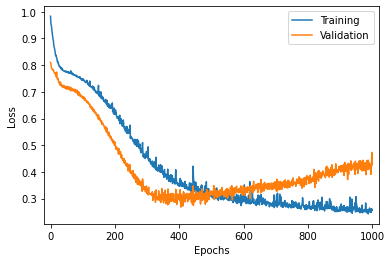

In [5]:
# 学習曲線をプロット

loss = results.history['loss']
vloss = results.history['val_loss']
plt.xlim(-20, 1020)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, label='Training')
plt.plot(vloss, label='Validation')
plt.legend()
plt.show()

In [13]:
def sigmoid(x):
    return np.exp(np.minimum(x,0))/(1+np.exp(-np.abs(x)))

model=Sequential()
model.add(Dense(16,input_dim=1,activation=sigmoid))
model.add(Dense(16,input_dim=1,activation=sigmoid))
model.add(Dense(16,input_dim=1,activation=sigmoid))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()

# 学習の実行
results = model.fit(res_x_train, res_y_train, epochs=1000, batch_size=4, verbose=0, validation_data=(res_x_valid, res_y_valid))

NotImplementedError: Exception encountered when calling layer "dense_21" (type Dense).

Cannot convert a symbolic tf.Tensor (dense_21/BiasAdd:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.

Call arguments received by layer "dense_21" (type Dense):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)

10/10 [==============================] - 0s 3ms/step


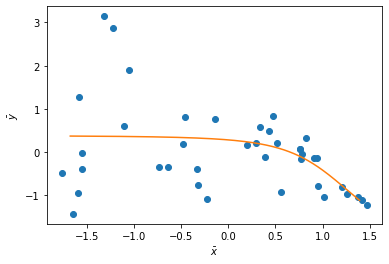

In [11]:
# 結果をプロット
import matplotlib.pyplot as plt

pred = model.predict(res_x)
plt.plot(res_x_train, res_y_train, 'o')
plt.plot(res_x, pred)
plt.xlabel(r'$\bar{x}$')
plt.ylabel(r'$\bar{y}$')
plt.show()